In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [180]:
df = pd.read_csv('C:/Users/Dell/OneDrive\Desktop/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [181]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [183]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


DESCRIBE RATINGS DISTRIBUTION


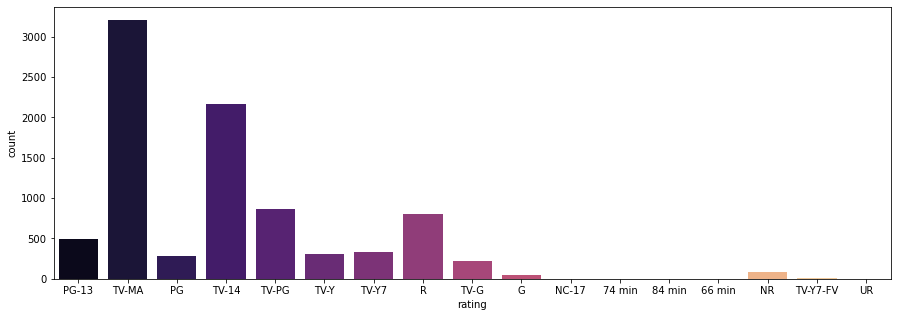

In [184]:
ax = plt.subplots(figsize=(15,5))
ax= sns.countplot(x='rating', data=df, palette='magma')

In [185]:
z = df.groupby(['rating']).size().reset_index(name='counts')

#arr=z.to_numpy()
#print(z)
z.head()


,rating,counts
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3


In [186]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  17 non-null     object
 1   counts  17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


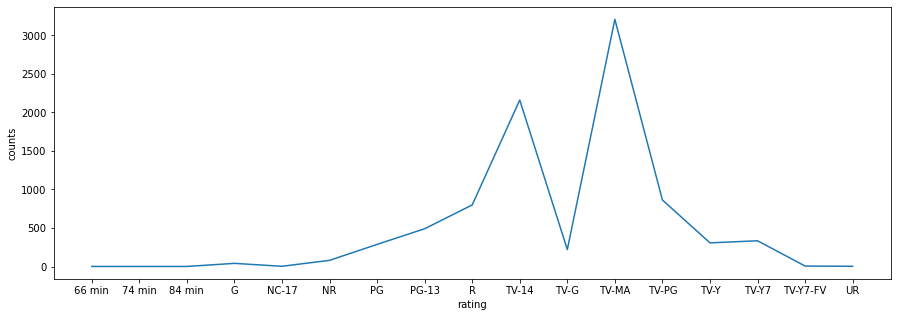

In [187]:
ax1= plt.subplots(figsize=(15,5))
ax1= sns.lineplot(x= 'rating', y='counts', data=z,  palette='Paired')

**TOP 5 DIRECTORS ON PLATFORM**

In [188]:
df['director']=df['director'].fillna('NO DIRECTOR SPECIFIED')
df['director'].head(30)

0                                   Kirsten Johnson
1                             NO DIRECTOR SPECIFIED
2                                   Julien Leclercq
3                             NO DIRECTOR SPECIFIED
4                             NO DIRECTOR SPECIFIED
5                                     Mike Flanagan
6                     Robert Cullen, José Luis Ucha
7                                      Haile Gerima
8                                   Andy Devonshire
9                                    Theodore Melfi
10                            NO DIRECTOR SPECIFIED
11                                Kongkiat Komesiri
12                              Christian Schwochow
13                                    Bruno Garotti
14                            NO DIRECTOR SPECIFIED
15                            NO DIRECTOR SPECIFIED
16    Pedro de Echave García, Pablo Azorín Williams
17                            NO DIRECTOR SPECIFIED
18                                       Adam Salky
19          

In [189]:
df = df[df['director'] != 'NO DIRECTOR SPECIFIED']
df['director'].head(15)

0                                   Kirsten Johnson
2                                   Julien Leclercq
5                                     Mike Flanagan
6                     Robert Cullen, José Luis Ucha
7                                      Haile Gerima
8                                   Andy Devonshire
9                                    Theodore Melfi
11                                Kongkiat Komesiri
12                              Christian Schwochow
13                                    Bruno Garotti
16    Pedro de Echave García, Pablo Azorín Williams
18                                       Adam Salky
20                                  Olivier Megaton
22                                   K.S. Ravikumar
23                          Alex Woo, Stanley Moore
Name: director, dtype: object

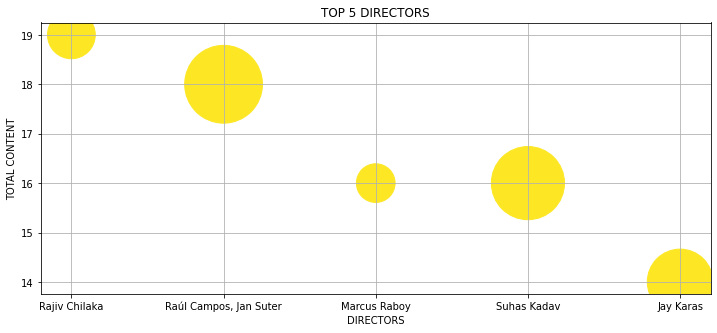

In [190]:
fig,ax = plt.subplots(figsize=(12,5))
d = df['director'].value_counts()
x = d.index[:5]
y = d.values[:5]
#ax.plot(x,y,marker='o')
#plt.grid()

sizes = np.random.uniform(10,8000,5)
colors = np.random.uniform(1000,2000,5)

ax.scatter(x, y, s=sizes, c=colors, vmin=10, vmax=20)

plt.grid()
ax.set_title('TOP 5 DIRECTORS')
ax.set_xlabel('DIRECTORS')
ax.set_ylabel('TOTAL CONTENT')
plt.show()

In [191]:
d.head()


Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: director, dtype: int64

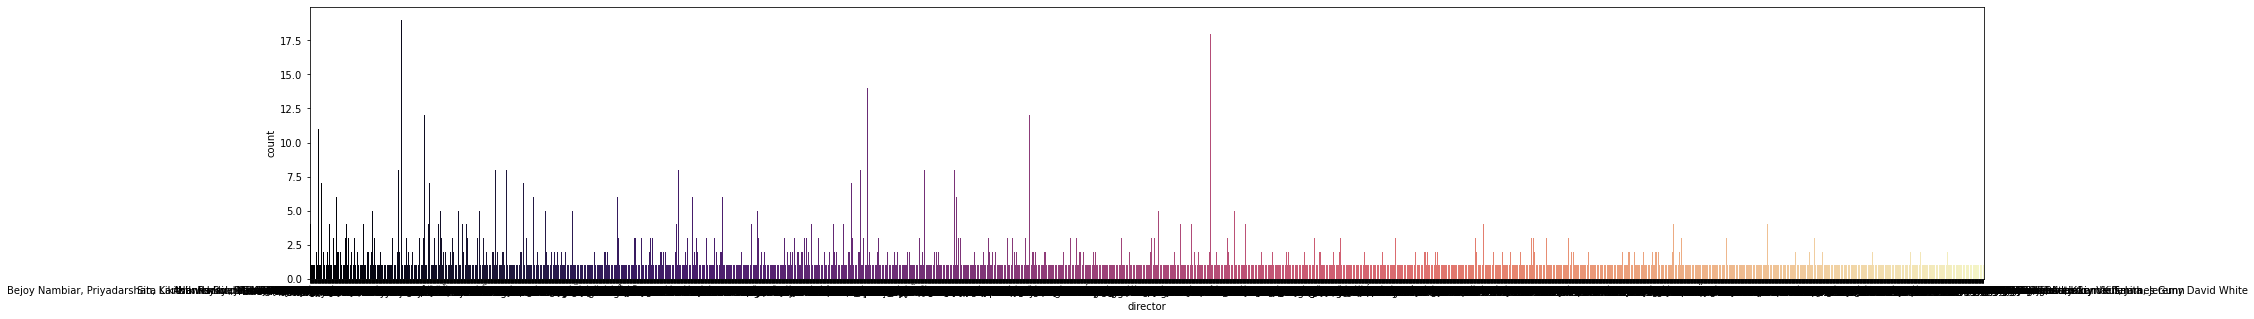

In [169]:
ax = plt.subplots(figsize=(30,5))
ax= sns.countplot(x= 'director', data= df, palette= 'magma')

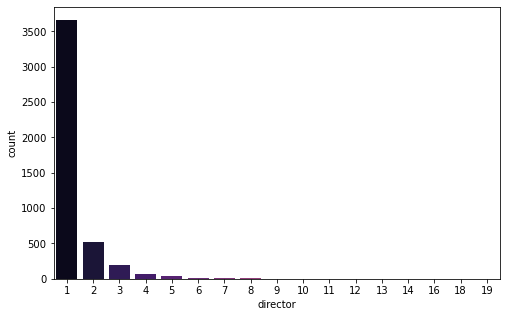

In [108]:
ax = plt.subplots(figsize=(8,5))
ax= sns.countplot(x= 'director', data= top_directors, palette= 'magma')

**TOP 5 ACTOR ON PLATFORM**

In [192]:
df['cast'] = df['cast'].fillna('NO CAST SPECIFIED')
df['cast'].head(10)

0                                     NO CAST SPECIFIED
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
11    Sukollawat Kanarot, Sushar Manaying, Pavarit M...
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...
13    Klara Castanho, Lucca Picon, Júlia Gomes, Marc...
Name: cast, dtype: object

In [193]:
df = df[df['cast'] != 'NO CAST SPECIFIED']
df['cast'].head(30)

2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
11    Sukollawat Kanarot, Sushar Manaying, Pavarit M...
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...
13    Klara Castanho, Lucca Picon, Júlia Gomes, Marc...
18    Freida Pinto, Logan Marshall-Green, Robert Joh...
22    Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...
23    Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...
26    Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....
27    Adam Sandler, Kevin James, Chris Rock, David S...
28    Keri Russell, Josh Hamilton, J.K. Simmons, Dak...
29    Liam Hemsworth, Gary Oldman, Amber Heard, Harr...
30    Abhishek Banerjee, Rinku Rajguru, Delzad H

In [284]:
filtered_cast = pd.DataFrame
filtered_cast = df['cast'].str.split(',',expand = True).stack()
print(filtered_cast)

2     0             Sami Bouajila
      1              Tracy Gotoas
      2               Samuel Jouy
      3             Nabiha Akkari
      4            Sofia Lesaffre
                    ...          
8806  3          Manish Chaudhary
      4              Meghna Malik
      5             Malkeet Rauni
      6            Anita Shabdish
      7     Chittaranjan Tripathy
Length: 45465, dtype: object


In [279]:
filtered_cast = filtered_cast.to_frame()

In [283]:
filtered_cast.columns = ['Actor']
actors = filtered_cast.groupby(['Actor']).size().reset_index(name='total_content')
actors = actors.sort_values(by=['total_content'],ascending = False)
actors.head()

,Actor,total_content
1998,Anupam Kher,38
19806,Rupa Bhimani,27
17280,Om Puri,27
28087,Shah Rukh Khan,26
3196,Boman Irani,25


In [286]:

print(x1,y1)

1998        Anupam Kher
19806      Rupa Bhimani
17280           Om Puri
28087    Shah Rukh Khan
3196        Boman Irani
Name: Actor, dtype: object 1998     38
19806    27
17280    27
28087    26
3196     25
Name: total_content, dtype: int64


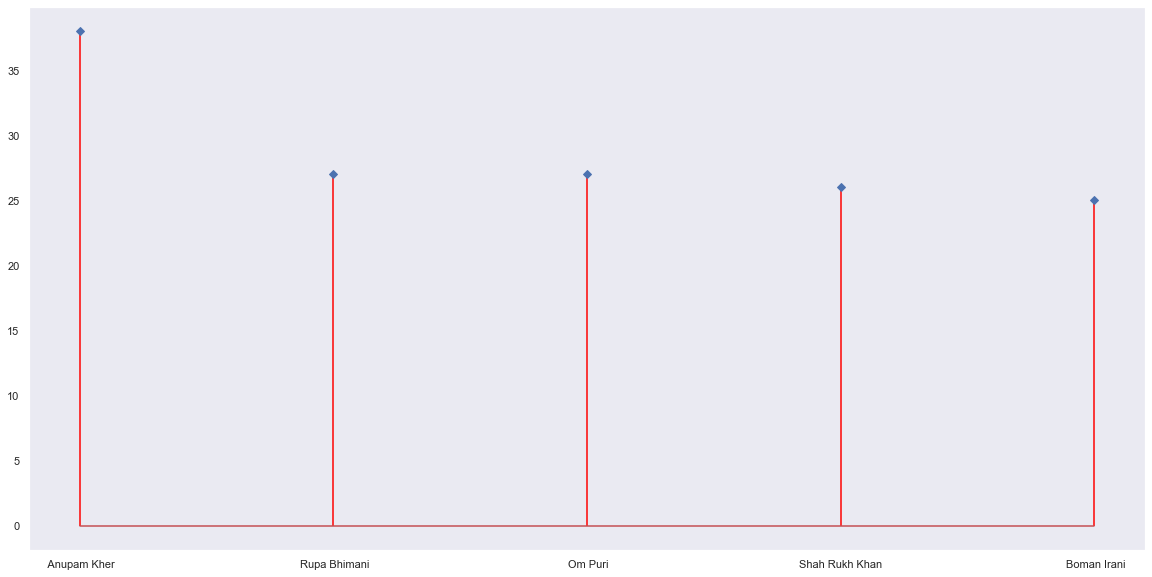

Text(3.200000000000017, 0.5, 'TOTAL CONTENT')

In [287]:
fig,ax = plt.subplots(figsize = (20,10))

x = actors.Actor[:5]
y = actors.total_content[:5]

ax.stem(x, y, linefmt= 'red', markerfmt= 'D') 
plt.grid()
#ax.plot(x1,y1,marker='x',color='red')
plt.show()

ax.set_title('TOP 5 ACTORS')
ax.set_xlabel('ACTOR')
ax.set_ylabel('TOTAL CONTENT')

**Analyzing Content on Netflix Over 10 Years**

In [200]:
df2 = df[['type', 'release_year']]
print(df2)

         type  release_year
2     TV Show          2021
5     TV Show          2021
6       Movie          2021
7       Movie          1993
8     TV Show          2021
...       ...           ...
8801    Movie          2015
8802    Movie          2007
8804    Movie          2009
8805    Movie          2006
8806    Movie          2015

[5700 rows x 2 columns]


In [201]:
df2 = df2.rename(columns={'release_year':'Release Year'})
df_2 = df2.groupby(['Release Year','type']).size().reset_index(name = 'TOTAL CONTENT')
print(df_2)

    Release Year     type  TOTAL CONTENT
0           1942    Movie              1
1           1944    Movie              1
2           1945    Movie              1
3           1946    Movie              1
4           1947    Movie              1
..           ...      ...            ...
83          2019  TV Show             26
84          2020    Movie            458
85          2020  TV Show             41
86          2021    Movie            227
87          2021  TV Show             29

[88 rows x 3 columns]


In [202]:
df_2 = df_2[df_2['Release Year']>=2010]
print(df_2)

    Release Year     type  TOTAL CONTENT
64          2010    Movie            145
65          2010  TV Show              1
66          2011    Movie            137
67          2011  TV Show              3
68          2012    Movie            165
69          2012  TV Show              4
70          2013    Movie            207
71          2013  TV Show              2
72          2014    Movie            244
73          2014  TV Show              8
74          2015    Movie            356
75          2015  TV Show             11
76          2016    Movie            574
77          2016  TV Show             10
78          2017    Movie            665
79          2017  TV Show             19
80          2018    Movie            673
81          2018  TV Show             18
82          2019    Movie            544
83          2019  TV Show             26
84          2020    Movie            458
85          2020  TV Show             41
86          2021    Movie            227
87          2021

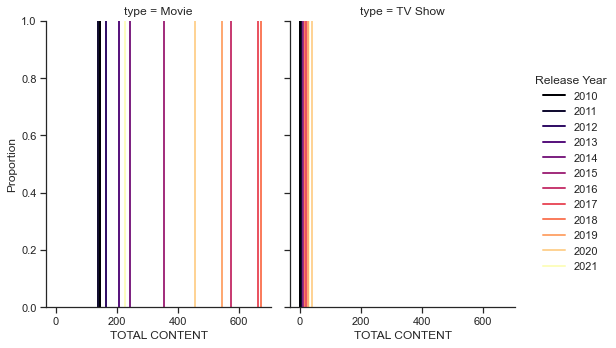

In [229]:
#fig, axes = plt.subplots(figsize=(30,10), sharex=True, sharey=True)

sns.set_theme(style='ticks')
#sns.displot(data= df_2, x= 'TOTAL CONTENT', hue = 'Release Year', kind= 'kde', palette="ch:rot=-.25,hue=1,light=.75")


sns.displot(data = df_2, x= 'TOTAL CONTENT', col= 'type', hue='Release Year', kind= 'ecdf', palette='magma',  aspect=.75, linewidth=2)

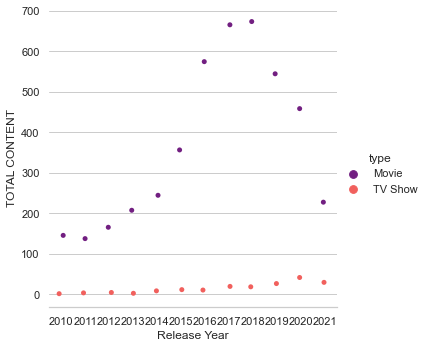

In [258]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data= df_2, y='TOTAL CONTENT', x='Release Year',hue= 'type',ci='sd',palette ='magma')
sns.despine(left=True)

**SENTIMENT ANALYSIS**

In [263]:
!pip install textblob
from textblob import TextBlob

In [264]:
dfs = df[['release_year','description']]
dfs = dfs.rename(columns={'release_year':'Release Year'})

for index,row in dfs.iterrows():
    z= row['description']
    testimonial = TextBlob(z)
    p= testimonial.sentiment.polarity
    if p==0:
        sent='neutral'
    elif p>0:
        sent='positive'
    else:
        sent='negative'
        
    dfs.loc[[index,2],'Sentiment']=sent

dfs= dfs.groupby(['Release Year','Sentiment']).size().reset_index(name='TOTAL CONTENT')
dfs= dfs[dfs['Release Year']>=2010]
dfs.head()
    
    

,Release Year,Sentiment,TOTAL CONTENT
142,2010,negative,44
143,2010,neutral,27
144,2010,positive,75
145,2011,negative,39
146,2011,neutral,23


<AxesSubplot:xlabel='Release Year', ylabel='TOTAL CONTENT'>

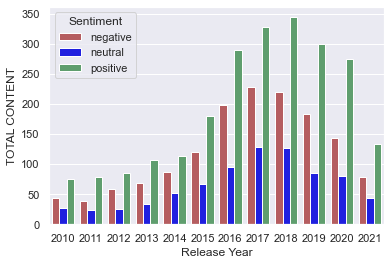

In [272]:
sns.set_theme(style= 'darkgrid')
sns.barplot(data= dfs, x= 'Release Year', y= 'TOTAL CONTENT', hue='Sentiment', 
              palette= {'negative':'r', 'positive':'g', 'neutral':'blue'} )
#sns.displine(left = True)
